In [1]:
import random
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
os.chdir('..')

In [9]:
from src.standard_ga.simulation import GA
from src.common.fitness import griewank, schwefel

In [4]:
ga = GA(fitness_fn=griewank, mutation_scale=.2)
solution, history = ga.run(100, population_size=200, seed=1)

In [7]:
scales = {
    'schwefel': (500, .5), 
    'rastrigin': (5.12, .05), 
    'griewank': (600, .2), 
    'ackley': (32, .05)
}

In [5]:
history

,best_fitness,avg_fitness,epoch,ncalls,seed
0,31.576774,150.673448,0,200,1
1,4.705215,64.793542,1,520,1
2,3.246737,23.668445,2,840,1
3,3.035715,7.519120,3,1160,1
4,1.684446,3.794556,4,1480,1
...,...,...,...,...,...
95,0.544669,0.799791,95,30600,1
96,0.544669,0.801863,96,30920,1
97,0.544669,0.766253,97,31240,1
98,0.544669,0.741399,98,31560,1


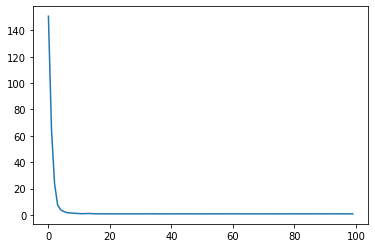

In [6]:
plt.plot(history.avg_fitness)

In [10]:
ga = GA(fitness_fn=schwefel, mutation_scale=scales['schwefel'][1], population_scale=scales['schwefel'][0])
solution, history = ga.run(100, population_size=200, seed=1, verbose=True)

Epoch: 0, Min griewank_function: 791.4611568975361
Epoch: 1, Min griewank_function: 645.2311946315463
Epoch: 2, Min griewank_function: 502.3191908863382
Epoch: 3, Min griewank_function: 245.70483965116114
Epoch: 4, Min griewank_function: 210.99537716850637
Epoch: 5, Min griewank_function: 192.3163829296343
Epoch: 6, Min griewank_function: 182.4867412552885
Epoch: 7, Min griewank_function: 181.56724515635165
Epoch: 8, Min griewank_function: 179.86749053011795
Epoch: 9, Min griewank_function: 178.78484173010247
Epoch: 10, Min griewank_function: 178.6418400852715
Epoch: 11, Min griewank_function: 178.61692247803558
Epoch: 12, Min griewank_function: 178.59081722569545
Epoch: 13, Min griewank_function: 178.58054753652482
Epoch: 14, Min griewank_function: 178.5796695228105
Epoch: 15, Min griewank_function: 178.57450576453812
Epoch: 16, Min griewank_function: 178.5717757072639
Epoch: 17, Min griewank_function: 178.57039914444022
Epoch: 18, Min griewank_function: 178.57020439242092
Epoch: 19, 